In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from py_iontrap_eda.designer import RadialDesign, AxialDesign, TrapDesign, RadialDesigner, TrappingParameters
from py_iontrap_eda.utils import IonLibrary, Units

## 1. Radial Design

In [28]:
default_trapping_parameters = TrappingParameters(ion=IonLibrary.Ba137, ion_height=60 * Units.um, rf_frequency=2*np.pi * 36*Units.MHz, rf_voltage=150*Units.V)
radial_designer = RadialDesigner(default_trapping_parameters)

In [29]:
inner_dc_list = np.linspace(25, 60, 101) * Units.um
rf_width_list, trap_depth_list, q_list, secular_freq_list = radial_designer.geometry_sweep(inner_dc_list)

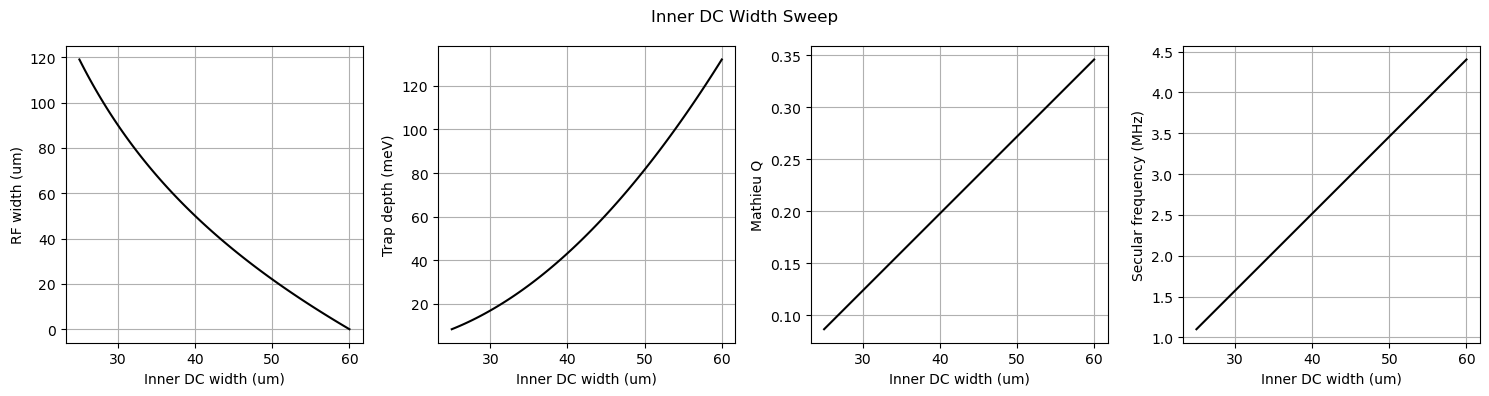

In [32]:
fig = plt.figure(figsize=(15, 4))
axes = [fig.add_subplot(141 + i) for i in range(4)]
x_labels = ['Inner DC width (um)'] * 4
y_labels = ['RF width (um)', 'Trap depth (meV)', 'Mathieu Q', 'Secular frequency (MHz)']
plot_data = [rf_width_list, trap_depth_list, q_list, secular_freq_list]
plot_units = [Units.um, Units.meV, 1, 2 * np.pi * Units.MHz]
for ax, data, x_label, y_label, plot_unit in zip(axes, plot_data, x_labels, y_labels, plot_units):
    ax.plot(inner_dc_list / Units.um, data / plot_unit, c='k')
    ax.grid()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
fig.suptitle('Inner DC Width Sweep')
fig.tight_layout()

In [31]:
sweep_voltages = np.linspace(50, 200, 101) * Units.V
sweep_parameters = [TrappingParameters(rf_voltage=rf_voltage) for rf_voltage in sweep_voltages]
trap_depth_list, q_list, secular_freq_list = radial_designer.parameter_sweep(40 * Units.um, sweep_parameters)

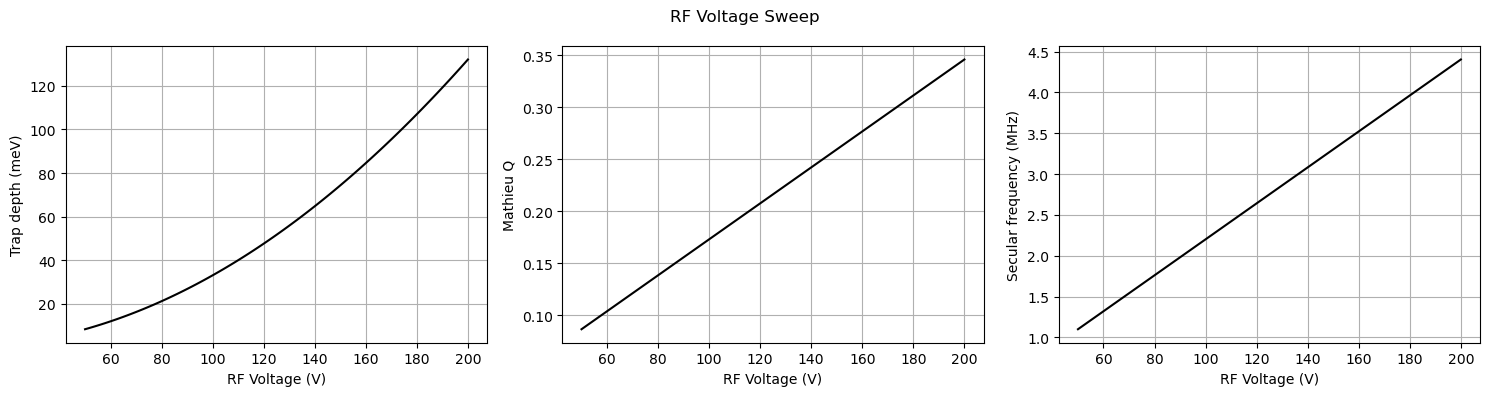

In [36]:
fig = plt.figure(figsize=(15, 4))
axes = [fig.add_subplot(131 + i) for i in range(3)]
x_labels = ['RF Voltage (V)'] * 3
y_labels = ['Trap depth (meV)', 'Mathieu Q', 'Secular frequency (MHz)']
plot_data = [trap_depth_list, q_list, secular_freq_list]
plot_units = [Units.meV, 1, 2 * np.pi * Units.MHz]
for ax, data, x_label, y_label, plot_unit in zip(axes, plot_data, x_labels, y_labels, plot_units):
    ax.plot(sweep_voltages / Units.V, data / plot_unit, c='k')
    ax.grid()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
fig.suptitle('RF Voltage Sweep')
fig.tight_layout()